## Hypothesis: The yearly total precipitation correlates with soil moisture levels in Corpus Christi

## Null Hypothesis (H0): The yearly total precipitation does not correlate with soil moisture levels in Corpus Christi

    
**Data obtained from https://climate.northwestknowledge.net/NWTOOLBOX/formattedDownloads.php**

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates

In [2]:
#monthly soil moisture and precipitation from 1958-2023
df = pd.read_csv("soilM_.precip_maxTemp_CorpusChristi.csv",header=0, parse_dates=True, skiprows= 10)
#precip_xr = xr.open_dataset("precip.mon.mean.nc")

In [3]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + df['Month'].astype(str), format='%Y%m')

In [4]:
df.set_index('Date', inplace=True)

In [5]:
df.head()

,Year,Month,soil(in),ppt(in),tmax(degF)
Date,,,,,
1958-01-01,1958,1,8.62,3.31,39.27
1958-02-01,1958,2,8.62,3.40,47.35
1958-03-01,1958,3,8.49,1.64,47.64
1958-04-01,1958,4,8.62,4.40,53.98
1958-05-01,1958,5,5.73,0.71,74.68


**Let's have a graphical idea of the relationship between both variables**w

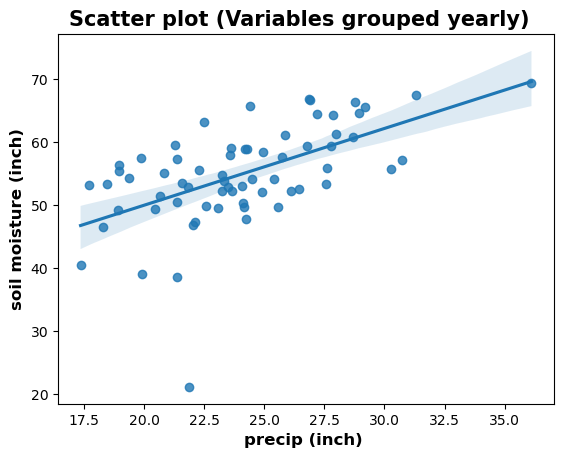

In [7]:
yearly_p_s = df[['ppt(in)','soil(in)']].groupby(pd.Grouper(freq='A')).sum()
sns.regplot(data =yearly_p_s , x = 'ppt(in)', y ='soil(in)')
plt.title('Scatter plot (Variables grouped yearly)  ', weight='bold', fontsize = 15)
plt.ylabel('soil moisture (inch)', weight='bold', fontsize = 12)
plt.xlabel('precip (inch) ', weight='bold', fontsize = 12)
plt.show()

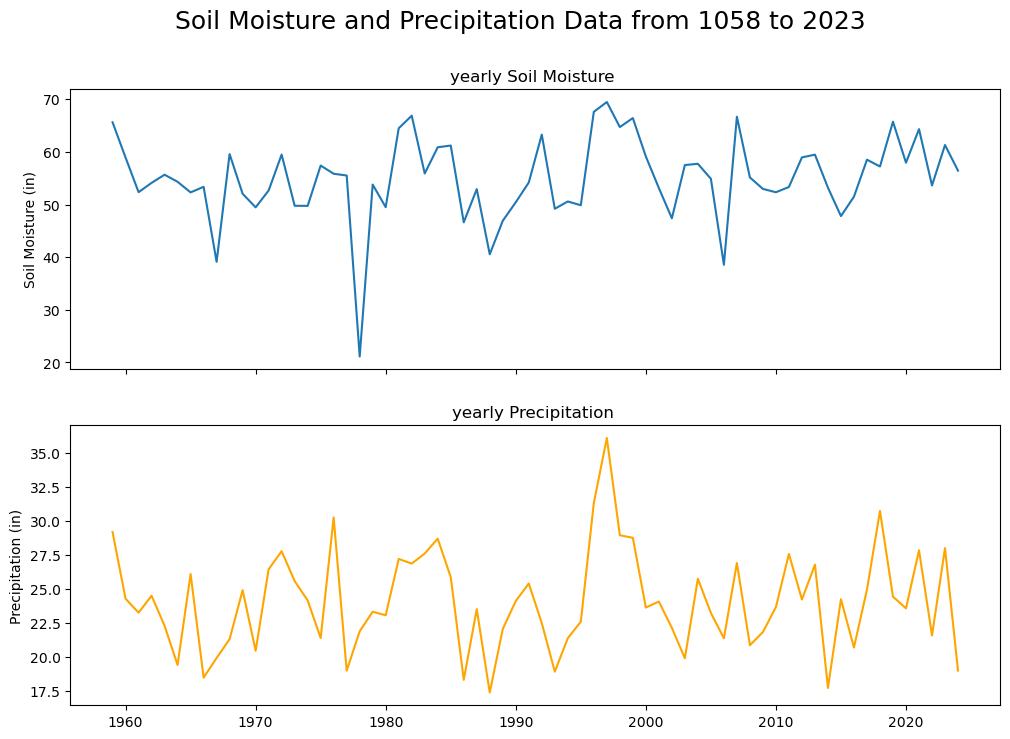

In [8]:


# Creating a figure and a 6x4 grid of subplots with shared x-axis
fig, axes = plt.subplots(2, 1, figsize=(12, 8), dpi=100, sharex=True)

# Soil moisture subplot
axes[0].plot(yearly_p_s.index, yearly_p_s['soil(in)'], label='Soil Moisture')
axes[0].set_ylabel('Soil Moisture (in)')
axes[0].set_title('yearly Soil Moisture ')

# Precipitation subplot
axes[1].plot(yearly_p_s.index, yearly_p_s['ppt(in)'], color='orange', label='Precipitation')
axes[1].set_ylabel('Precipitation (in)')
axes[1].set_title('yearly Precipitation ')

# Setting the x-axis major formatter to display years
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.suptitle('Soil Moisture and Precipitation Data from 1058 to 2023', fontsize=18)
plt.show()



**The correlation between both varibles is not exactly clear from the above graph. We shall proceed with out discoveries**

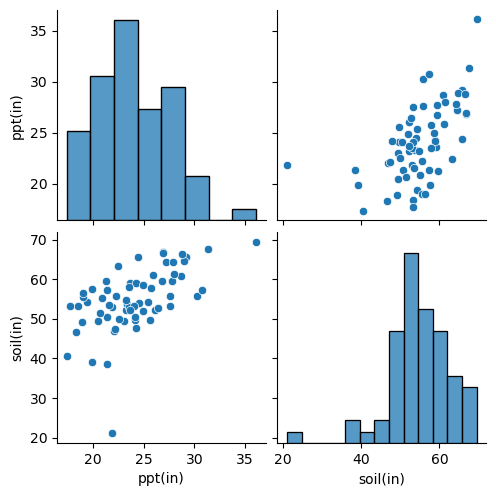

In [10]:
sns.pairplot(yearly_p_s)
plt.show()

In [11]:
#calculating pearson's coeeficient between soilmoisture and precip.
r, p_val = pearsonr(yearly_p_s['soil(in)'], yearly_p_s['ppt(in)'])

In [12]:
print(f" Correlation : {r} , Pvalue: {p_val}")

 Correlation : 0.5714359961163377 , Pvalue: 5.413903704934011e-07


**Correlation (r): The Pearson's correlation coefficient is approximately  0.571.This suggests a moderate positive linear relationship between yearly total precipitation and soil moisture levels in Corpus Christi. This means as precipitation increases, soil moisture also tends to increase to some extent.**

**P-value: The p-value is approximately 5.41×10−7 , which is significantly small. This indicates that the probability of observing such a correlation by chance (if there were actually no correlation in the population from which the sample was drawn) is extremely low. We reject the null hypothesis**

In [13]:
# Calculating Spearman (monotonic) correlation coefficient
spearman_correlation = yearly_p_s['ppt(in)'].corr(yearly_p_s['soil(in)'], method='spearman')

print(spearman_correlation)

0.5894374282433985


In [15]:
# Assuming 'ppt' is your independent variable (predictor) and 'soil' is your dependent variable (response)
X = yearly_p_s['ppt(in)']  # Independent variable what im trying to predict
y = yearly_p_s['soil(in)']  # Dependent variable (response)

# Add a constant to the predictor variable set to represent the intercept
X = sm.add_constant(X)

# Create a model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Make predictions
yearly_p_s['predictions'] = results.predict(X)
# Print the summary of the regression
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               soil(in)   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     31.03
Date:                Sat, 24 Feb 2024   Prob (F-statistic):           5.41e-07
Time:                        13:01:09   Log-Likelihood:                -216.30
No. Observations:                  66   AIC:                             436.6
Df Residuals:                      64   BIC:                             441.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.6180      5.331      4.806      0.0

**The R-squared value is 0.327, which means that approximately 32.7% of the variability in soil moisture is explained by the model. This isn't very high, suggesting that precipitation alone does not fully explain the changes in soil moisture.**

**F-statistic and Prob (F-statistic): The F-statistic is 31.03 with a very small p-value (5.42×10−7), indicating that the model is statistically significant.**

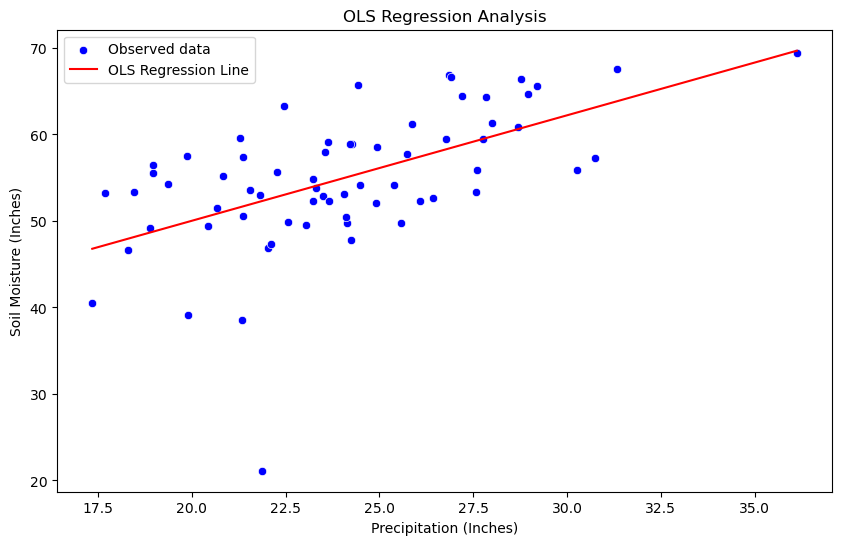

In [16]:
plt.figure(figsize=(10, 6))

# Scatter plot of observed data
sns.scatterplot(x='ppt(in)', y='soil(in)', data=yearly_p_s, color='blue', label='Observed data')

# Line plot for the regression line
sns.lineplot(x='ppt(in)', y='predictions', data=yearly_p_s, color='red', label='OLS Regression Line')

plt.title('OLS Regression Analysis')
plt.xlabel('Precipitation (Inches)')
plt.ylabel('Soil Moisture (Inches)')
plt.legend()
plt.show()

**The positive slope of the regression line indicates that there is a positive relationship between precipitation and soil moisture; as precipitation increases, the soil moisture also tends to increase. The distribution of points suggests some variability around the regression line, which is expected in real-world data.**

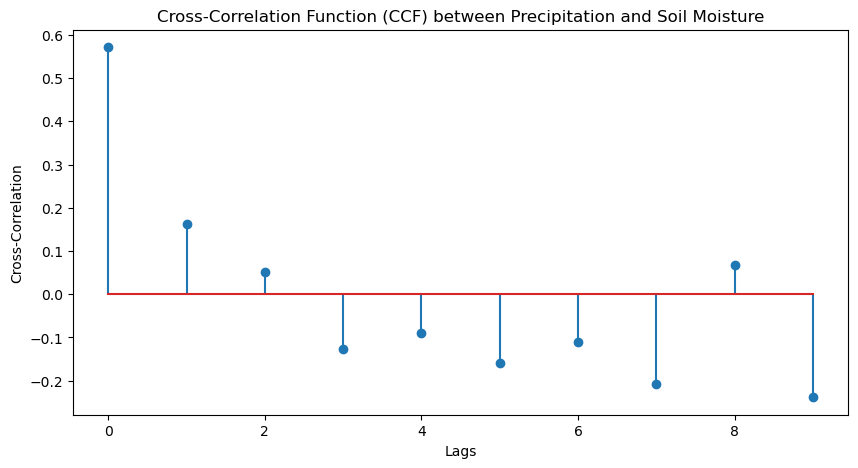

In [17]:

import statsmodels.tsa.stattools as smt


# Calculate Cross-Correlation Function (CCF) between 'ppt(in)' and 'soil(in)'
max_lags = 10
ccf_results = smt.ccf(yearly_p_s['ppt(in)'], yearly_p_s['soil(in)'], adjusted=False)[:max_lags]

plt.figure(figsize=(10, 5))
plt.stem(range(max_lags), ccf_results, use_line_collection=True)
plt.xlabel('Lags')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation Function (CCF) between Precipitation and Soil Moisture')
plt.show()


**Lag 0: At lag 0, the correlation is at its highest point on the plot, indicating that there's a strong positive correlation when the two series are aligned with no lag. This suggests that there's a contemporaneous relationship between precipitation and soil moisture—when precipitation is high (or low), soil moisture is also high (or low) at the same time.**

**Lags 1-9: As the lag increases, the correlation values fluctuate above and below zero but are generally lower than at lag 0. The positive values indicate a positive correlation at those lags, meaning that past values of one variable are positively associated with future values of the other variable.**

**Negative Correlations: Some lags have negative correlation values,**